# Dataset

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, utils

In [2]:
transform = transforms.Compose(
    [transforms.Ignore(difficult=True),
     transforms.Normalize(),
     transforms.Centered(),
     transforms.Resize((300, 300)), # if resizing first, can't be normalized
     transforms.OneHot(class_nums=datasets.VOC_class_nums),
     transforms.ToTensor()]
)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset), transform=transform)


In [3]:
from models.core.boxes import center2minmax

def box_show(img, locs):
    print(locs)
    locs_mm = center2minmax(locs).numpy()
    
    # Blue color in BGR 
    color = (255, 0, 0) 

    # Line thickness of 2 px 
    thickness = 2
    
    h, w, c = img.shape
    locs_mm[:, ::2] *= w
    locs_mm[:, 1::2] *= h
    locs_mm = locs_mm
    locs_mm = np.clip(locs_mm, 0, w).astype(np.int)
    
    print(locs_mm)
    for bnum in range(locs_mm.shape[0]):
        topleft = locs_mm[bnum, :2]
        bottomright = locs_mm[bnum, 2:]
        
        print(tuple(topleft), tuple(bottomright))
        cv2.rectangle(img, tuple(topleft), tuple(bottomright), color, thickness)
    return img

(300, 300, 3)
tensor([[0.6410, 0.5706, 0.7180, 0.8408, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[0.6410, 0.5706, 0.7180, 0.8408]])
[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


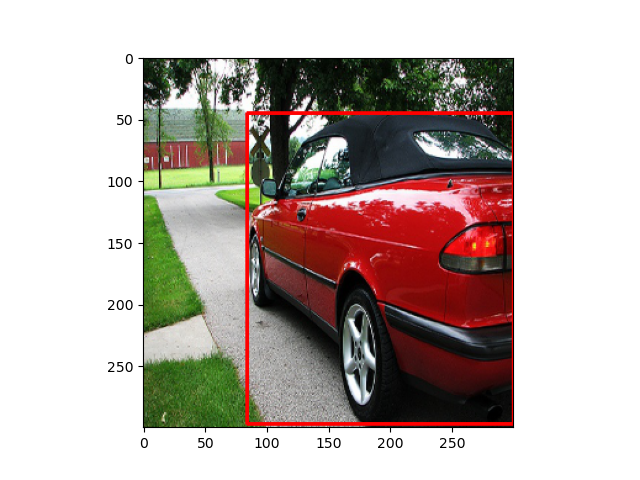

(300, 300, 3)
tensor([[0.2190, 0.7477, 0.2300, 0.4985, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([[0.2190, 0.7477, 0.2300, 0.4985]])
[[ 31 149 100 299]]
(31, 149) (100, 299)


<IPython.core.display.Javascript object>


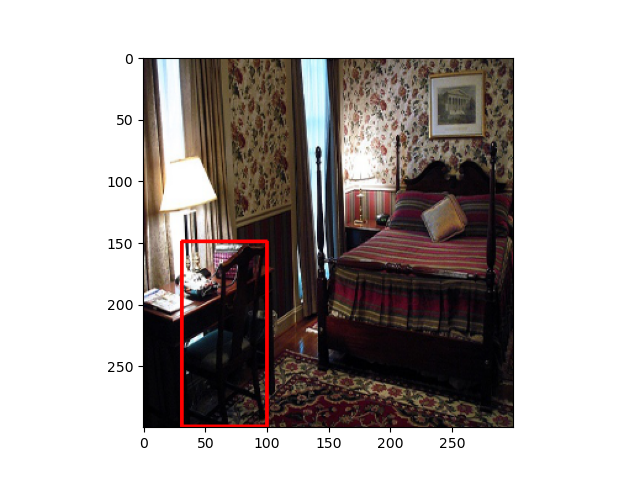

(300, 300, 3)
tensor([[0.4320, 0.3340, 0.4267, 0.2840, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000]])
tensor([[0.4320, 0.3340, 0.4267, 0.2840]])
[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


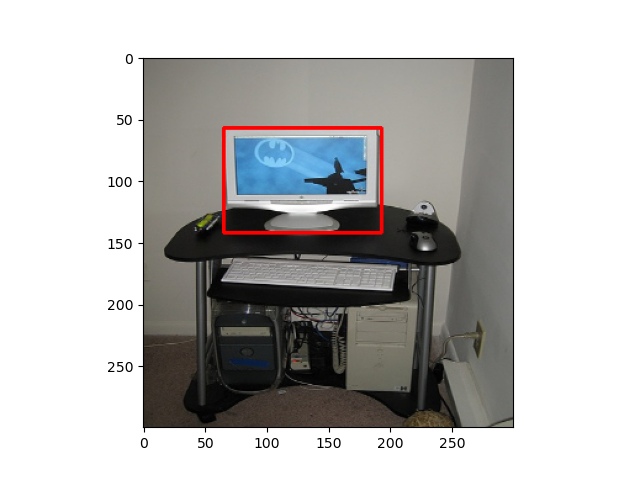

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

indices = [1, 100, 150]

for index in indices:
    # img's shape = (c, h, w)
    img, targets = train_dataset[index]
    # convert to (h, w, c)
    img = img.numpy().transpose((1,2,0)).astype(np.uint8)
    print(img.shape)

    print(targets)
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = box_show(img, locs)
    
    plt.figure()
    plt.imshow(img)